##Tirmzi Analysis
n=1000 m+=1000 nm-=120 istep= 4 min=150 max=700

In [1]:
import sys
sys.path
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy import signal

In [2]:
ls

 Volume in drive C is Local Disk
 Volume Serial Number is AA1B-997A

 Directory of C:\Users\emaro\OneDrive - University of Mount Union\XSEDE Summer 2021\xsede-spm\data

09/07/2021  09:42 AM    <DIR>          .
09/07/2021  09:42 AM    <DIR>          ..
09/06/2021  09:19 PM    <DIR>          .ipynb_checkpoints
08/31/2021  09:51 AM    <DIR>          0307-testinputfile4-0004
08/31/2021  09:51 AM    <DIR>          0308-testinputfile4-0004
08/31/2021  09:51 AM    <DIR>          0309-VariedNuni_8_2_2021-0000
08/31/2021  09:51 AM    <DIR>          0310-VariedNuni_8_2_2021-0000
08/31/2021  09:51 AM    <DIR>          0311-VariedNuni_8_2_2021-0001
08/31/2021  09:51 AM    <DIR>          0312-VariedNuni_8_2_2021-0001
08/31/2021  09:51 AM    <DIR>          0313-VariedNuni_8_2_2021-0002
08/31/2021  09:51 AM    <DIR>          0314-VariedNuni_8_2_2021-0002
08/31/2021  09:51 AM    <DIR>          0315-er_equal_1-0002
08/31/2021  09:51 AM    <DIR>          0316-er_equal_1-0002
08/31/2021  09:51 AM    <DIR

In [3]:
import capsol.newanalyzecapsol as ac

In [4]:
ac.get_gridparameters

<function capsol.newanalyzecapsol.get_gridparameters(f_name)>

In [5]:
import glob

In [6]:
cd Output-Fortran

C:\Users\emaro\OneDrive - University of Mount Union\XSEDE Summer 2021\xsede-spm\data\Output-Fortran


In [7]:
ls

 Volume in drive C is Local Disk
 Volume Serial Number is AA1B-997A

 Directory of C:\Users\emaro\OneDrive - University of Mount Union\XSEDE Summer 2021\xsede-spm\data\Output-Fortran

09/07/2021  09:36 AM    <DIR>          .
09/07/2021  09:36 AM    <DIR>          ..
09/07/2021  09:34 AM    <DIR>          .ipynb_checkpoints
08/31/2021  10:49 AM    <DIR>          0307-testinputfile4-0004
08/31/2021  10:49 AM    <DIR>          0308-testinputfile4-0004
08/31/2021  10:49 AM    <DIR>          0309-VariedNuni_8_2_2021-0000
08/31/2021  10:49 AM    <DIR>          0310-VariedNuni_8_2_2021-0000
08/31/2021  10:49 AM    <DIR>          0311-VariedNuni_8_2_2021-0001
08/31/2021  10:49 AM    <DIR>          0312-VariedNuni_8_2_2021-0001
08/31/2021  10:49 AM    <DIR>          0313-VariedNuni_8_2_2021-0002
08/31/2021  10:49 AM    <DIR>          0314-VariedNuni_8_2_2021-0002
08/31/2021  10:49 AM    <DIR>          0315-er_equal_1-0002
08/31/2021  10:49 AM    <DIR>          0316-er_equal_1-0002
08/31/2021  1

In [8]:
folders = glob.glob("*NewTirmzi_large_range*/")
folders


['0395-NewTirmzi_large_range-0001\\',
 '0397-NewTirmzi_large_range-0000\\',
 '0399-NewTirmzi_large_range-0002\\']

In [9]:
all_data= dict() 
for folder in folders:
    params = ac.get_gridparameters(folder + 'capsol.in')
    data = ac.np.loadtxt(folder + 'Z-U.dat')
    process_data = ac.process_data(params, data, smoothing=False, std=5*10**-9)
    all_data[folder]= (process_data)
all_params= dict()
for folder in folders:
    params=ac.get_gridparameters(folder + 'capsol.in')
    all_params[folder]= (params)

In [10]:
all_data

{'0395-NewTirmzi_large_range-0001\\': {'z': array([150.    , 152.0001, 153.9999, 156.    , 158.0001, 159.9999,
         162.    , 164.0001, 165.9999, 168.    , 170.0001, 171.9999,
         174.    , 176.0001, 177.9999, 180.    , 182.0001, 183.9999,
         186.    , 188.0001, 189.9999, 192.    , 194.0001, 195.9999,
         198.    , 200.0001, 201.9999, 204.    , 206.0001, 207.9999,
         210.    , 212.0001, 213.9999, 216.    , 218.0001, 219.9999,
         222.    , 224.0001, 225.9999, 228.    , 230.0001, 231.9999,
         234.    , 236.0001, 237.9999, 240.    , 242.0001, 243.9999,
         246.    , 248.0001, 249.9999, 252.    , 254.0001, 255.9999,
         258.    , 260.0001, 261.9999, 264.    , 266.0001, 267.9999,
         270.    , 272.0001, 273.9999, 276.    , 278.0001, 279.9999,
         282.    , 284.0001, 285.9999, 288.    , 290.0001, 291.9999,
         294.    , 296.0001, 297.9999, 300.    , 302.0001, 303.9999,
         306.    , 308.0001, 309.9999, 312.    , 314.0001, 31

In [11]:
all_data.keys()

dict_keys(['0395-NewTirmzi_large_range-0001\\', '0397-NewTirmzi_large_range-0000\\', '0399-NewTirmzi_large_range-0002\\'])

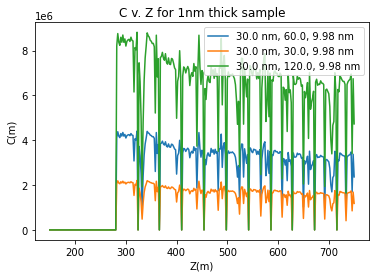

In [24]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == 9.98}:
    data=all_data[key]
    thickness =all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    plt.plot(data['z'], data['c'], label= f'{rtip} nm, {er}, {thickness} nm')
    
    
plt.title('C v. Z for 1nm thick sample')    
plt.ylabel("C(m)")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("C' v. Z for 1nm thick sample 06-28-2021.png")

cut off last experiment because capacitance was off the scale

No handles with labels found to put in legend.


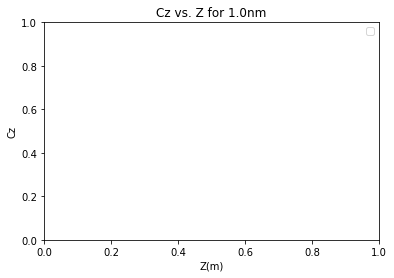

In [13]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == .5}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(4,-3)
    plt.plot(data['z'][s], data['cz'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('Cz vs. Z for 1.0nm')    
plt.ylabel("Cz")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Cz v. Z for varying sample thickness, 06-28-2021.png")

No handles with labels found to put in legend.


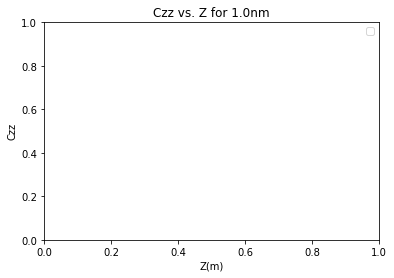

In [14]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == .5}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(5,-5)
    plt.plot(data['z'][s], data['czz'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('Czz vs. Z for 1.0nm')    
plt.ylabel("Czz")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Czz v. Z for varying sample thickness, 06-28-2021.png")

In [15]:
params

{'n': 750,
 'm+': 750,
 'm-': 88,
 'h0': 0.5,
 'rho_max': 1000000.0,
 'z_max': 1000000.0,
 'min': 150.0,
 'max': 750.0,
 'istep': 4.0,
 'Rtip': 30.0,
 'half-angle': 20.0,
 'HCone': 11999.99,
 'RCantilever': 13750.0,
 'thickness_Cantilever': 1000.01,
 'eps_r': 120.0,
 'Thickness_sample': 9.98,
 'Solving Method': 'LAPACK',
 'Test': 0,
 'Verbosity': 0,
 'Nuni': 1,
 'Equally spaced': True}

No handles with labels found to put in legend.


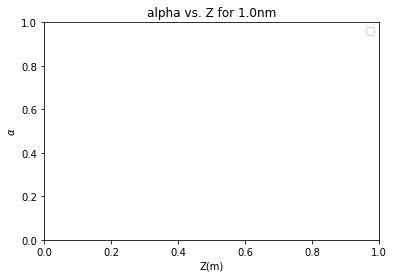

In [16]:
for key in {key: params for key, params in all_params.items() if params['Thickness_sample'] == .5}:
    data=all_data[key]
    thickness=all_params[key]['Thickness_sample']
    rtip= all_params[key]['Rtip']
    er=all_params[key]['eps_r']
    s=slice(8,-8)
    plt.plot(data['z'][s], data['alpha'][s], label=f'{rtip} nm, {er}, {thickness} nm' )
    
plt.title('alpha vs. Z for 1.0nm')    
plt.ylabel("$\\alpha$")
plt.xlabel("Z(m)")
plt.legend()
plt.savefig("Alpha v. Z for varying sample thickness, 06-28-2021.png")

In [17]:
data

array([[5.0000000e+00, 1.0493846e+03, 2.0987691e+03],
       [5.0666700e+00, 1.0492510e+03, 2.0985020e+03],
       [5.1333300e+00, 1.0491179e+03, 2.0982358e+03],
       [5.2000000e+00, 1.0489851e+03, 2.0979703e+03],
       [5.2666700e+00, 1.0488528e+03, 2.0977056e+03],
       [5.3333300e+00, 1.0487208e+03, 2.0974416e+03],
       [5.4000000e+00, 1.0485892e+03, 2.0971785e+03],
       [5.4666700e+00, 1.0484580e+03, 2.0969161e+03],
       [5.5333300e+00, 1.0483272e+03, 2.0966544e+03],
       [5.6000000e+00, 1.0481967e+03, 2.0963935e+03],
       [5.6666700e+00, 1.0480666e+03, 2.0961332e+03],
       [5.7333300e+00, 1.0479369e+03, 2.0958737e+03],
       [5.8000000e+00, 1.0478074e+03, 2.0956149e+03],
       [5.8666700e+00, 1.0476784e+03, 2.0953567e+03],
       [5.9333300e+00, 1.0475496e+03, 2.0950993e+03],
       [6.0000000e+00, 1.0474212e+03, 2.0948425e+03],
       [6.0666700e+00, 1.0472932e+03, 2.0945864e+03],
       [6.1333300e+00, 1.0471654e+03, 2.0943309e+03],
       [6.2000000e+00, 1.047

In [18]:
from scipy.optimize import curve_fit


In [19]:
def Cz_model(z, a, n, b,):
    return(a*z**n + b)

In [20]:
all_data.keys()

dict_keys(['0395-NewTirmzi_large_range-0001\\', '0397-NewTirmzi_large_range-0000\\', '0399-NewTirmzi_large_range-0002\\'])

In [21]:
data= all_data['capsol-calc\\0001-capsol\\']
z= data['z'][1:-1]
cz= data['cz'][1:-1]

KeyError: 'capsol-calc\\0001-capsol\\'

In [ ]:
popt, pcov= curve_fit(Cz_model, z, cz, p0=[cz[0]*z[0], -1, 0])
a=popt[0]
n=popt[1]
b=popt[2]
std_devs= np.sqrt(pcov.diagonal())
sigma_a = std_devs[0]
sigma_n = std_devs[1]
model_output= Cz_model(z, a, n, b)
rmse= np.sqrt(np.mean((cz - model_output)**2))


In [ ]:
f"a= {a} ± {sigma_a}"

In [ ]:
f"n= {n}± {sigma_n}"

In [ ]:
model_output

In [ ]:
"Root Mean Square Error"

In [ ]:
rmse/np.mean(-cz)